# TITLE: Video Games Sales Data Analysis
## Author: Andrea Giussani
### Serie in the Long Beard Blog
### Date: Feb 17, 2021


Have you ever wondered what is the most played video game in the last thirty years? How about which gaming platform is the most used in the last decade? Is Super Mario the most popular game ever? Or is Call of Duty the most appealing one in the last decade?

In this post, we are going to explore advanced data manipulation techniques that are typically used to translate raw data into insightful plots and charts — enabling you to answer these types of questions.

To perform this analysis, we will use the Python language, and we will explore two of the most important data analytics libraries: Pandas and Matplotlib.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## 1. Data Manipulation and Cleaning

### 1.1 Data Ingestion

We read the file `'data/vgsales.csv'` using the pandas `read_csv()` function, and store it into the variable `data`. 

In [4]:
data = pd.read_csv('data/vgsales.csv')

We now check the overall composition of the dataset using the `.info()` method

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


### 1.2 Data Cleaning

We clearly see there exists a few null values among both the `Publisher` and `Year` columns. The strategy here is to remove them. <br>
Let us remove the null values using the pandas `.dropna()` method:

In [6]:
data.dropna(subset=['Publisher', 'Year'], how='any', inplace=True)

The dataset was generated at the end of the year 2016. Hence, each observation with an occurrence greater than or equal to 2017 must be considered as either corrupted or incorrect, and hence must be removed.

In [7]:
data = data.query('Year < 2017')

### 1.3 Data Consistency

Before moving to a proper data analysis, we need to be sure the data is consistent. By consistency I mean an intrinsic characteristic of the data. For instance, the `Publisher` name might contain a typo, or sometimes a Publisher might be identified by several names. 

To investigate this, let us check how `Sony` appears inside our dataset: we hence access to the `Publisher` column, which is of type object, and try to check the different names `Sony` is used for: 

In [8]:
data[data['Publisher'].str.contains('sony', case=False)]['Publisher'].value_counts()

Sony Computer Entertainment            682
Sony Computer Entertainment Europe      15
Sony Online Entertainment                8
Sony Computer Entertainment America      3
Sony Music Entertainment                 1
Name: Publisher, dtype: int64

Obviously, the Sony Publisher identifier is not homogeneously identified among observations.

We might think of, say, changing `“Sony Computer Entertainment”`, `“Sony Computer Entertainment America”`, `“Sony Computer Entertainment Europe”`, `“Sony Music Entertainment”` and `“Sony Online Entertainment”` to `“Sony”`.

To do this, we basically create a custom method, called `merging_info_publisher`, that should be called whenever we wish to perform such kind of cleaning on our data.

In [9]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
def merging_info_publisher(data: pd.DataFrame, publisher: str):
    data.loc[data['Publisher'].str.contains(publisher, case=False), 'Publisher'] = publisher
    return data[data['Publisher'].str.contains(publisher, case=False)]['Publisher'].value_counts()

Possibly, this pattern is repeated for different publishers as well. Here we identify a few Publishers that might have different labels inside the dataset, and we apply the `merging_info_publisher` method for each of them.

In [10]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
publishers = ['Sony', 'Nintendo', 'Ubisoft', 'Activision', 'Electronic Arts', 'Konami']
for publisher in publishers:
    merging_info_publisher(data, publisher)

Let us check now how `"Sony"` is mapped inside our dataset:

In [11]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
data[data['Publisher'].str.contains('Sony')]['Publisher'].value_counts()

Sony    709
Name: Publisher, dtype: int64

An extra control is to convert `EA Sports` to `Electronic Arts`.

In [12]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
data.loc[data['Publisher'].str.contains('EA Sports', case=False), 'Publisher'] = 'Electronic Arts'

Also, convert `['Bandai', 'Namco Bandai', 'Namco', 'Namco Bandai Games' ]` to `Namco`.

In [13]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
namco_names = ['Bandai', 'Namco Bandai', 'Namco', 'Namco Bandai Games' ]
data.loc[data['Publisher'].str.contains('|'.join(namco_names), case=False), 'Publisher'] = 'Namco'

Let us check the absolute distribution of the top 20 Publishers in our dataset:

In [14]:
data['Publisher'].value_counts().head(20)

Electronic Arts                           1341
Activision                                 996
Ubisoft                                    931
Namco                                      928
Konami                                     823
THQ                                        712
Sony                                       709
Nintendo                                   696
Sega                                       630
Take-Two Interactive                       412
Capcom                                     376
Atari                                      347
Tecmo Koei                                 338
Square Enix                                231
Warner Bros. Interactive Entertainment     217
Disney Interactive Studios                 214
Midway Games                               196
Eidos Interactive                          196
505 Games                                  192
Microsoft Game Studios                     189
Name: Publisher, dtype: int64

Finally, remove the Publisher called `"Unknown"`: this is not obviously fine. Store the result into the global variable `filtered_data`

In [15]:
filtered_data = data[data['Publisher']!='Unknown']

## 2. Total Games Released Each Year

We now want to know when the video game industry experienced a drastic development. Based on the number of games released each year, we might be able to find out when the video games boom happened. We store the distribution of video games releases by year inside the variable `counter_df_by_year`.

In [16]:
counter_df_by_year = filtered_data[['Name', 'Year']].drop_duplicates().groupby('Year').count()
counter_df_by_year.rename(columns={'Name': 'Number of Games'}, inplace=True)

Let us embed that dataframe into a graphical dimension:

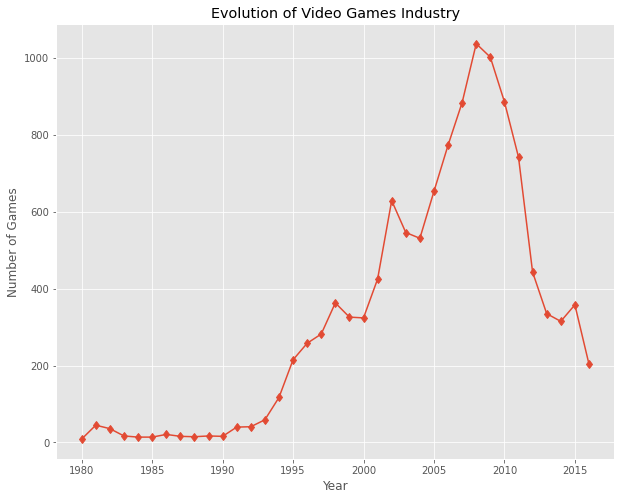

In [17]:
with plt.style.context('ggplot'):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.plot(counter_df_by_year.index, counter_df_by_year['Number of Games'], marker='d')
    ax.set_xlabel('Year')
    ax.set_ylabel('Number of Games')
    ax.set_title('Evolution of Video Games Industry')
    plt.show()

There was a significant boom in the late 2000s. Since then, the distinct number of release has shrunk possibly due to a more convergence to popular titles by both customers and developers.

## 3. Publisher Analysis with respect to Global Sales

Instead of considering absolute frequencies (with respect to the number of video games releases) of the top publishers, a better proxy is to consider the top publishers by Global Sales, identified by the columns `"Global_sales"`.

In [18]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
total_sales_df = filtered_data[['Global_Sales', 'Publisher']].drop_duplicates().groupby('Publisher').sum()
top_10_sales = total_sales_df.sort_values(by='Global_Sales', ascending=False).head(10)

### 3.2 Graphical Representation of the Publishers

We again embed the above dataset into a graphical dimension to better understand the data.

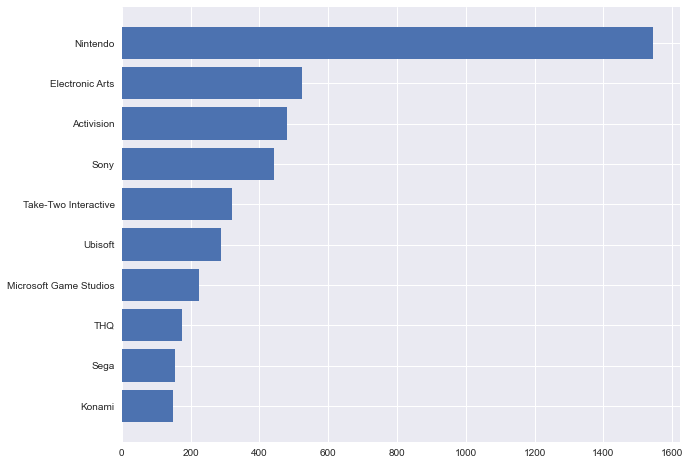

In [19]:
df = top_10_sales[::-1]
with plt.style.context('seaborn'):
    fig, ax = plt.subplots(figsize=(10,8))
    ax.barh(df.index, df['Global_Sales'])
    plt.show()

## 4. Understand the most popular Platform by Year 

We now want to go further and try to see which Platform was the most popular for each Year. To do so, we again use a proxy the total Global Sales with respect to video games for each specific Platform. 

However, this requires a little bit of data wrangling, and therefore we need to perform a few steps to be able to answer to this question.

First of all, we count the number of video games by Platform using the `.groupby()` method, and we store the result into the variable `most_popular_platforms`. This has been done for you.

In [20]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
most_popular_platforms = filtered_data[['Name','Platform']].drop_duplicates().groupby('Platform').count()
most_popular_platforms.rename(columns={'Name': 'Total Observations'}, inplace=True)

We then need two steps:
* store inside the variable `top20_platforms` the top 20 platform with respect to the column `Total Observations`;
* filter the `filtered_data` with those Platforms. Store the result into `filtered_data_top20`.

In [21]:
top_20_platforms = most_popular_platforms.sort_values(by='Total Observations', ascending=False).head(20)
filtered_data_top20 = filtered_data[filtered_data['Platform'].isin(list(top_20_platforms.index))]

We aggregate the data with respect to Global Sales using the pandas `.pivot_table()`. We would like to have, as columns, the platforms' vendor and, as index, the year. Store the result into the `pivoted_data_df`.

In [22]:
pivoted_data = filtered_data_top20.pivot_table(
    index='Year',
    columns='Platform',
    values='Global_Sales',
    aggfunc='sum',
    fill_value=0
)

The next part is a little bit tricky and it has been already prefilled for you. 
We now want to find the `Platform` which has the top sales for each distinct year. To do that we employ the `NumPy` method `argsort()` which basically allows to sort, for each row, the observations in ascending order.

In [23]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
rows_arrangement = np.argsort(-pivoted_data.values, axis=1)

We then select the column names based on the sorting operation, so that in the first place we will find the platform with highest value with respect to the aggregated Global Sales.

In [24]:
# DO NOT REMOVE! THIS HAS BEEN PREFILLED FOR YOU
data_platform_by_year = pd.DataFrame(pivoted_data.columns[rows_arrangement], index=pivoted_data.index)

### 4.1 Distribution of the most popular platforms during the last 40 years

Store the resulting dataframe object into the variable `most_popular_platform_by_year`.

In [25]:
most_popular_platform_by_year = pivoted_data.idxmax(axis=1).reset_index()
most_popular_platform_by_year.rename(columns={0: 'Platform'}, inplace=True)

In [26]:
most_popular_platform_by_year.tail()

,Year,Platform
32,2012.0,PS3
33,2013.0,PS3
34,2014.0,PS4
35,2015.0,PS4
36,2016.0,PS4


## 5. Which was the most popular game in each Year?

Store the resulting dataframe object into the variable `most_popular_games`.

In [27]:
most_popular_games = pd.DataFrame()
for _, row in most_popular_platform_by_year.iterrows():
    year = row['Year']
    platform = row['Platform']
    
    inner_df = filtered_data.query("Year == @year & Platform==@platform")
    
    pivoted_table_year_platform = inner_df.pivot_table(
        index = 'Year',
        columns='Name',
        values='Global_Sales',
        aggfunc='sum',
        fill_value=0
    )
    
    temp_col_max_value = pivoted_table_year_platform.max(axis=1).to_frame() # finds max value by row
    temp_col_max_value.rename(columns={0:'Total sales (ML of units)'}, inplace=True)
    
    temp_col_max = pivoted_table_year_platform.idxmax(axis=1).to_frame() # find the column with the greatest value on each row
    temp_col_max.rename(columns={0:'Most Wanted Title'}, inplace=True)
    
    merging_dfs = pd.concat([temp_col_max, temp_col_max_value], axis=1)
    
    most_popular_games = most_popular_games.append(merging_dfs)

In [28]:
most_popular_games

,Most Wanted Title,Total sells (ML of units)
Year,,
1980.0,Asteroids,4.31
1981.0,Pitfall!,4.50
1982.0,Pac-Man,7.81
1983.0,Pitfall II: Lost Caverns,1.31
1984.0,Beamrider,0.27
1985.0,Ghostbusters,0.45
1986.0,Solaris,0.37
1987.0,Kung-Fu Master,0.65
1988.0,River Raid II,0.51


## 6. Which was the most sold Title by Platform?

Create a new object, called `most_popular_vg_by_platform`, that join the information from `most_popular_platfrom_by_year` and `most_popular_games`. Print the result in console.

In [29]:
most_popular_vg_by_platform = most_popular_games.reset_index().merge(
    most_popular_platform_by_year, on='Year'
)

In [30]:
most_popular_vg_by_platform[
    ['Platform', 'Most Wanted Title', 'Total sells (ML of units)']
].groupby('Platform').max()

,Most Wanted Title,Total sells (ML of units)
Platform,,
2600,Solaris,7.81
PS,Tekken 3,10.95
PS2,Need for Speed Underground,20.81
PS3,Grand Theft Auto V,21.40
PS4,Grand Theft Auto V,14.24
SNES,The Legend of Zelda: A Link to the Past,20.61
Wii,Wii Sports Resort,82.74
X360,Kinect Adventures!,21.82


## 7. Which are the most sold videogames ever?

We are interesting in investigating which were the most sold titles in the last 40 years. To do so, we employ the `.groupby()` method, and store the result into the `most_wanted_vg` variable.

In [31]:
most_wanted_vg = filtered_data_top20[
    ['Name', 'Global_Sales']
].groupby('Global_Sales').sum()

In [32]:
most_wanted_vg.sort_values(by='Global_Sales', ascending=False).head(10)

,Name
Global_Sales,
82.74,Wii Sports
35.82,Mario Kart Wii
33.00,Wii Sports Resort
30.01,New Super Mario Bros.
29.02,Wii Play
28.62,New Super Mario Bros. Wii
24.76,Nintendogs
23.42,Mario Kart DS
22.72,Wii Fit


It looks like the nintendo games are the most sold! The Wii sports was such a huge success for Nintendo. The classic “Mario” games own 4 of Top 10 most popular games.

## 8. Top Video Game  for each of the Top 5 Publishers

In [33]:
# ALREADY FILLED FOR STUDENT
total_sales_df = filtered_data_top20[['Global_Sales', 'Publisher']].groupby('Publisher').sum()
top_5_sales = total_sales_df.sort_values(
    by='Global_Sales', ascending=False
).head(5).reset_index()

We now try to see which title was the most sold by publisher:

In [34]:
most_wanted_title_by_publisher = pd.DataFrame()

for _, row in top_5_sales.iterrows():
    publisher = row['Publisher']
    
    temp = pd.pivot_table(
        data = filtered_data_top20.query("Publisher == @publisher"),
        columns='Name',
        index='Publisher',
        values='Global_Sales',
        aggfunc='sum'
    ).fillna(0)
    
    
    temp_col_max_value = temp.max(axis=1).to_frame() # finds max value by row
    temp_col_max_value.rename(columns={0:'Total sales (ML of units)'}, inplace=True)
    
    temp_col_max = temp.idxmax(axis=1).to_frame() # find the column with the greatest value on each row
    temp_col_max.rename(columns={0:'Most Wanted Title'}, inplace=True)
    
    merging_dfs = pd.concat([temp_col_max, temp_col_max_value], axis=1)
    
    most_wanted_title_by_publisher = most_wanted_title_by_publisher.append(merging_dfs)

In [35]:
most_wanted_title_by_publisher

,Most Wanted Title,Total sells (ML of units)
Publisher,,
Nintendo,Wii Sports,82.74
Electronic Arts,FIFA 15,19.02
Activision,Call of Duty: Modern Warfare 3,30.83
Sony,Gran Turismo 3: A-Spec,14.98
Ubisoft,Assassin's Creed IV: Black Flag,13.16


## END